## BLM19462E Intro to MachineLearning HW2

### Name:Evren Keskin
### Student ID:1621221030

In [40]:
import numpy as np
import scipy.linalg

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

np.random.seed(seed=21)

# ignore warnings
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

<class 'ModuleNotFoundError'>: No module named 'seaborn'

**Q2-** The file "Q2Data1.txt" contains the dataset for linear regression problem. The first column is the year of experience and the second column is the salary of an employee. A negative value for debt amount.
otss.

In [3]:
# start by loading the data
data = pd.read_csv('Q2Data1.txt', header=None, names=['Experience', 'Salary'])

# initialize some useful variables
m = len(data) # the number of training examples
X = np.append(np.ones((m, 1)), np.array(data["Experience"]).reshape((m,1)), axis=1) # Add x0, a vector of 1's, to X.
y = np.array(data["Salary"]).reshape(m, 1)

data.head()

,Experience,Salary
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data.

Text(0, 0.5, 'Salary $1,000')

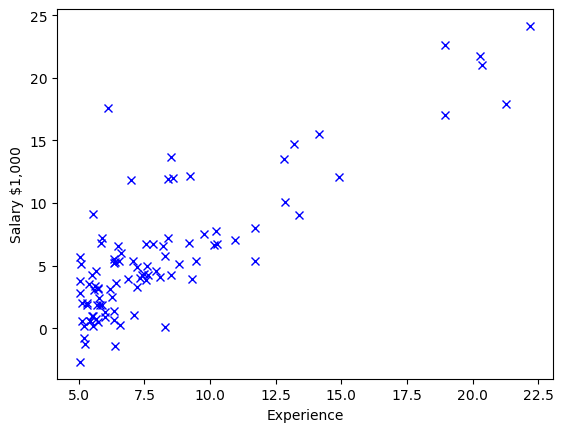

In [4]:
plt.plot(data['Experience'], data['Salary'], 'bx')
plt.xlabel('Experience')
plt.ylabel('Salary $1,000')

Our hypothesis function has the general form:

$y= h_\theta(x)= \theta_0 + \theta_1x$

We give to $h_\theta(x)$ values for $\theta_0$ and $\theta_1$ to get our estimated output $y$. 

##### Cost function
The cost functions yields "how far off" our hypotheses $h_\theta$ is.  Formally, the cost function has the following definition:

$J(\theta) = \frac{1}{2n} \displaystyle\sum_{i = 0}^{m}(h_θ(x^{(i)}) - y^{(i)})^2$

##### Vectorization
Vectorizations is the act of replacing the loops in a computer program with matrix operations. If you have a good linear algebra library (like numpy), the library will optimize the code automatically for the computer the code runs on. Mathematically, the 'regular' function should mean the same as the vectorized function.

Gradient descent vectorized:
$\theta = \frac{1}{2n}(X\theta - \vec{y})^T(X\theta-\vec{y})$


 - **a)** Implement a vectorized implementation of the cost function.

In [5]:
def costFunction(X, y, theta):
    """ Computes the cost of using theta as the parameter for linear regression to fit the data in X and y. """
    m = len(y)
    h = [np.dot(x, theta) for x in X]
    squared_error = [(h_i - y_i) ** 2 for h_i, y_i in zip(h, y)]
    J = (1 / (2 * m)) * sum(squared_error)
    return J

theta_test = np.array([[0], [0]])
cost = costFunction(X, y, theta_test)
print(f"Cost with theta [0, 0]: {cost}")


Cost with theta [0, 0]: [32.07273388]


**Answer:** 
With $\theta = \begin{bmatrix}0 & 0\end{bmatrix}$, 

$J(\theta)$ should return 32.07

In [6]:
initialTheta = np.zeros((2,1))
print(costFunction(X, y, initialTheta))

[32.07273388]


##### Gradient descent
We want are hypothesis $h_\theta(x)$ to function as good as possibly. Therefore, we want to minimalize the cost function $J(\theta)$. Gradient descent is an algorithm used to do that. 

The formal definition of gradient descent:

$repeat \ \{ \\ \enspace \theta_j := \theta_j - \alpha \frac{1}{m}\displaystyle\sum_{i = 1}^{m}(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}\\\}$


 - **b)** Implement the gradient descent algorithm in Python.

In [64]:
def gradientDescent(X, y, theta, alpha, iterations):
    """ Performs gradient descent to learn theta. 
    Returns the found value for theta and the history of the cost function.
    """
    m = len(y)  # Number of training examples
    J_history = []  # To store the history of the cost function
    
    for _ in range(iterations):

        # Compute the hypothesis
        h = np.dot(X, theta)
        
        # Compute the error
        error = h - y
        
        gradient = (1 / m) * np.dot(X.T, error)
        
        theta -= alpha * gradient
        # cost function and append it to the history
        J_history.append(costFunction(X, y, theta))
    
    return theta, J_history

**Answer:** 
Gradient descent should have found approximately the following: $\theta = \begin{bmatrix}-3.6303\\1.1664\end{bmatrix}$

In [32]:
# You can change different values for these variables
alpha = 0.01
iterations = 1500

theta, J_history = gradientDescent(X, y, initialTheta, alpha, iterations)
theta

array([[-3.89577561],
       [ 1.19303311]])

 - **c)** Using the results, plotting the regularization line

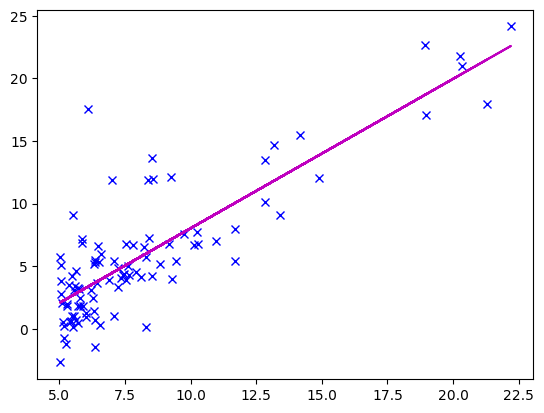

In [43]:
plt.plot(X[:,1], y, 'bx', label='Training data')
plt.plot(X[:,1], X.dot(theta), 'm-', label='Linear regression')


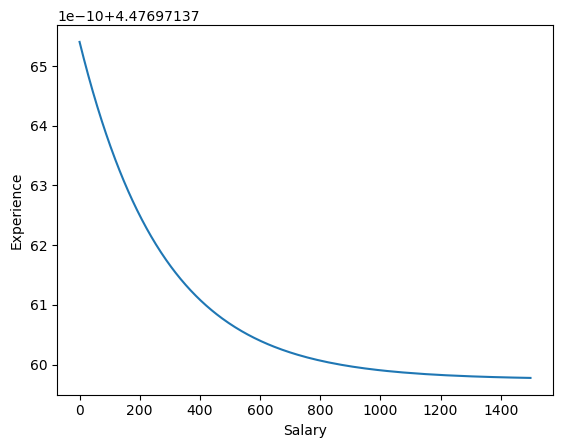

In [52]:
plt.plot(J_history, label='Regularization line')

plt.ylabel('Experience')
plt.xlabel('Salary')
plt.show()

 - **d)** Making a prediction using the model

The model can be used by calculating the dot product of the input and $\theta$.

In [56]:
def predict(X, theta):
    """Makes predictions using the linear regression model."""
    return np.dot(X, theta)

X_new = np.array([[12, 15]])
predicted_salary = predict(X_new, theta)
print("Predicted salary:", predicted_salary)

Predicted salary: [[-28.85381057]]


 - **e)** Run your "gradientDescent" function using a different constant learning rates and plot cost functions for each learning rates values. 



Text(0.5, 1.0, 'Cost Function History For Learning Rate')

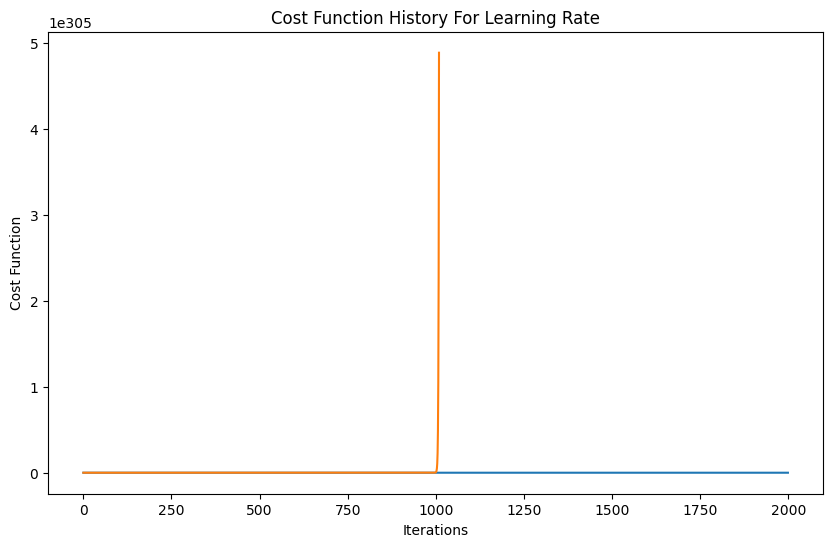

In [63]:
# Define different learning rates
alphas = [0.01, 0.03, 0.1, 0.3]

# Initialize theta with zeros
initialTheta = np.zeros((X.shape[1], 1))

# Number of iterations
iterations = 2000

# Initialize a plot
plt.figure(figsize=(10, 6))

# Loop through different learning rates
for alpha in alphas:
    theta, J_history = gradientDescent(X, y, initialTheta, alpha, iterations)
    
    # Plot cost function history for each learning rate
    plt.plot(range(iterations), J_history, label=f'Learning Rate: {alpha}')

plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Cost Function History For Learning Rate')
